# Develop k-Nearest Neighbors Classifier in Python From Scratch

<font color='green'> 
I implemented k-Nearest Neighbors Classification Algorithm in python from scratch using [iris.csv](https://www.kaggle.com/uciml/iris) dataset.
</font>

#### Kaynaklar: 

- [Develop k-Nearest Neighbors in Python From Scratch](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)

- [KNN-Python from Scratch](https://www.kaggle.com/nooneranjithkumar/knn-python-from-scratch)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

## Step 1: Data Loading

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data = iris.copy()

## Step 2: Data Visualization

Farklı çiçek türlerini scatter plot ile görselleştiriyoruz.

#### <font color='green'> Aşamaları </font>

In [5]:
data['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [6]:
set(data['Species'])

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [7]:
list(set(data['Species']))

['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']

In [8]:
Species = list(set(data['Species']))

In [9]:
data['Species'] == Species[0]

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: Species, Length: 150, dtype: bool

In [10]:
data[data['Species'] == Species[0]]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
59,60,5.2,2.7,3.9,1.4,Iris-versicolor


In [11]:
Specie1 = data[data['Species'] == Species[0]]

#### <font color='green'> Kod </font>

In [12]:
Species = list(set(data['Species']))
Specie1 = data[data['Species']==Species[0]]
Specie2 = data[data['Species']==Species[1]]
Specie3 = data[data['Species']==Species[2]]

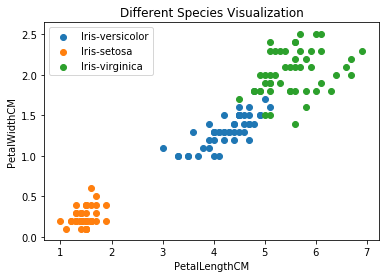

In [13]:
plt.scatter(Specie1['PetalLengthCm'], Specie1['PetalWidthCm'], label=Species[0])
plt.scatter(Specie2['PetalLengthCm'], Specie2['PetalWidthCm'], label=Species[1])
plt.scatter(Specie3['PetalLengthCm'], Specie3['PetalWidthCm'], label=Species[2])
plt.xlabel('PetalLengthCM')
plt.ylabel('PetalWidthCM')
plt.legend() #adlarını sol üste ekliyor
plt.title('Different Species Visualization');

## Step 3: Preprocessing

#### <font color='purple'> 1. id sütununu kaldırıyorum.</font>

In [14]:
req_data = data.iloc[:,1:]
req_data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### <font color='purple'> 2. overfitting sorunu yaşamamak için veriyi shufflelıyorum.</font>

In [15]:
shuffle_index = np.random.permutation(req_data.shape[0]) # rowa göre shufflelıyoruz.
req_data = req_data.iloc[shuffle_index]
req_data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
74,6.4,2.9,4.3,1.3,Iris-versicolor
131,7.9,3.8,6.4,2.0,Iris-virginica
139,6.9,3.1,5.4,2.1,Iris-virginica
11,4.8,3.4,1.6,0.2,Iris-setosa
127,6.1,3.0,4.9,1.8,Iris-virginica


#### <font color='purple'> 3. Veriyi train ve test olarak ayırıyorum. Testin y'sini drop ediyorum.</font>

In [16]:
req_data.shape

(150, 5)

In [17]:
train_size = int(req_data.shape[0]*0.7)

In [18]:
train_df = req_data.iloc[:train_size,:]
test_df = req_data.iloc[train_size:,:]

In [19]:
print(train_df.shape)
print(test_df.shape)

(105, 5)
(45, 5)


In [20]:
x_test = test_df.drop('Species', axis=1)

In [21]:
x_test.shape

(45, 4)

#### <font color='purple'>4. KNN Algoritmasına sokmak için tablo olarak değil array olarak almamız gerekecek datasetini. </font>

In [22]:
train = train_df.values

In [23]:
test = x_test.values

In [24]:
train

array([[6.4, 2.9, 4.3, 1.3, 'Iris-versicolor'],
       [7.9, 3.8, 6.4, 2.0, 'Iris-virginica'],
       [6.9, 3.1, 5.4, 2.1, 'Iris-virginica'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [6.1, 3.0, 4.9, 1.8, 'Iris-virginica'],
       [7.7, 3.0, 6.1, 2.3, 'Iris-virginica'],
       [5.5, 2.6, 4.4, 1.2, 'Iris-versicolor'],
       [6.9, 3.2, 5.7, 2.3, 'Iris-virginica'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [7.4, 2.8, 6.1, 1.9, 'Iris-virginica'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [7.6, 3.0, 6.6, 2.1, 'Iris-virginica'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 3.0, 4.2, 1.2, 'Iris-versicolor'],
       [5.2, 4.1, 1.5, 0.1, 'Iris-setosa'],
       [5.6, 2.9, 3.6, 1.3, 'Iris-versicolor'],
       [6.1, 2.9, 4.7, 1.4, 'Iris-versicolor'],
       [5.9, 3.2, 4.8, 1.8, 'Iris-versicolor'],
       [6.9, 3.1, 5.1, 2.3, 'Iris-virginica'],
       [7.2, 3.2, 6.0, 1.8, 'Iris-virginica'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [6.4, 3.2, 5.3, 2.

In [25]:
test

array([[4.9, 2.5, 4.5, 1.7],
       [5.5, 4.2, 1.4, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [4.6, 3.2, 1.4, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [6.7, 2.5, 5.8, 1.8],
       [5.1, 3.7, 1.5, 0.4],
       [6.9, 3.1, 4.9, 1.5],
       [5.4, 3.7, 1.5, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [4.8, 3. , 1.4, 0.3],
       [6.7, 3.3, 5.7, 2.1],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [6.7, 3.1, 5.6, 2.4],
       [5.8, 2.8, 5.1, 2.4],
       [6.6, 2.9, 4.6, 1.3],
       [7.7, 2.6, 6.9, 2.3],
       [6.1, 2.8, 4. , 1.3],
       [5.7, 2.6, 3.5, 1. ],
       [5.1, 3.4, 1.5, 0.2],
       [6.4, 2.7, 5.3, 1.9],
       [4.6, 3.4, 1.4, 0.3],
       [6.3, 2.8, 5.1, 1.5],
       [6.7, 3. , 5.2, 2.3],
       [5.2, 2.7, 3.9, 1.4],
       [6.3, 2.9, 5.6, 1.8],
       [6.3, 3.3, 6. , 2.5],
       [6. , 2.9, 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [5.6, 3

#### <font color='purple'>5. Testin gerçek y değerini ayrı bir değişkene atıyoruz ki en son bizim tahminimizle birlikte accuracy fonksiyonuna sokacağız.  </font>

In [26]:
y_true = test_df.iloc[:,-1]

In [27]:
y_true

106     Iris-virginica
33         Iris-setosa
36         Iris-setosa
101     Iris-virginica
47         Iris-setosa
41         Iris-setosa
108     Iris-virginica
21         Iris-setosa
52     Iris-versicolor
10         Iris-setosa
29         Iris-setosa
146     Iris-virginica
45         Iris-setosa
124     Iris-virginica
76     Iris-versicolor
16         Iris-setosa
140     Iris-virginica
114     Iris-virginica
58     Iris-versicolor
118     Iris-virginica
71     Iris-versicolor
79     Iris-versicolor
39         Iris-setosa
111     Iris-virginica
6          Iris-setosa
133     Iris-virginica
145     Iris-virginica
59     Iris-versicolor
103     Iris-virginica
100     Iris-virginica
78     Iris-versicolor
0          Iris-setosa
50     Iris-versicolor
51     Iris-versicolor
88     Iris-versicolor
77     Iris-versicolor
98     Iris-versicolor
34         Iris-setosa
128     Iris-virginica
102     Iris-virginica
15         Iris-setosa
82     Iris-versicolor
92     Iris-versicolor
31         

In [57]:
y_true = y_true.values

In [58]:
y_true.shape

(45,)

## Step 4: Creating Model with KNN Algorithm

### <font color='blue'>1. İki Row Arasındaki Öklid Uzaklığı Hesaplamak</font>

**A(x1,y1) ve B(x2,y2) noktaları arasında öklid uzaklığını hesaplamak:** 

```
d(A,B)^2 = (x2-x1)^2 + (y2-y1)^2 
d(A,B) = sqrt((x2-x1)^2 + (y2-y1)^2 )
```

**2 satır arasında öklid uzaklığını hesaplamak:**

Satırların tüm sütun değerleri için aynı işlemi yapıyoruz. 

```
test[0]	 5.6 3.0 4.5 1.5 Iris-versicolor
train[0] 4.9 3.1 1.5 0.1 Iris-setosa 
```
```
d(row1,row2)^2 = (5.6-4.9)^2 + (3.0-3.1)^2 + (4.5-1.5)^2 + (1.5-0.1)^2
d(row1,row2) = sqrt((5.6-4.9)^2 + (3.0-3.1)^2 + (4.5-1.5)^2 + (1.5-0.1)^2)
d(row1,row2) = 3,385262...
```


#### <font color='green'> Aşamaları </font>

In [29]:
train[0:5]

array([[6.4, 2.9, 4.3, 1.3, 'Iris-versicolor'],
       [7.9, 3.8, 6.4, 2.0, 'Iris-virginica'],
       [6.9, 3.1, 5.4, 2.1, 'Iris-virginica'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [6.1, 3.0, 4.9, 1.8, 'Iris-virginica']], dtype=object)

In [30]:
test[0:5]

array([[4.9, 2.5, 4.5, 1.7],
       [5.5, 4.2, 1.4, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [4.6, 3.2, 1.4, 0.2]])

#### <font color='green'> Kod</font>

In [31]:
def euclidean_distance(x_test_row, x_train_row): 
    distance = 0
    for i in range(len(x_train_row)-1): # Species sütununu hesaba katmıyoruz.
        distance = distance + ((x_test_row[i]-x_train_row[i])**2)
        
    return sqrt(distance)

In [32]:
euclidean_distance(test[0], train[0])

1.6155494421403513

### <font color='blue'> 2. En Yakın Komşuları Almak </font>
Test setinde bulunan **tek bir rowun** train setindeki her bir rowla olan uzaklığını hesaplayıp en yakın K tanesini alacağız.

#### <font color='green'> **Aşamaları** </font>

##### <font color='purple'>1. Elimizde test setindeki tek bir rowun traindeki her bir rowa olan uzaklığını bir listeye koyacağız.</font>

In [33]:
x_test_row = test[0]

In [34]:
def distances(x_test_row, x_train): # ilk parametre row, ikincisi tüm train listesi
    distances = []
    for x_train_row in x_train:
        distances.append(euclidean_distance(x_test_row, x_train_row))
        
    return distances

In [35]:
dist = distances(x_test_row, train)

In [36]:
len(dist)

105

In [37]:
dist

[1.6155494421403513,
 3.7934153476781316,
 2.3086792761230392,
 3.388214869219483,
 1.3638181696985852,
 3.318132004607411,
 0.7937253933193769,
 2.5079872407968904,
 3.4741905532080417,
 2.9899832775452104,
 3.5510561809129406,
 3.4799425282610623,
 4.024922359499621,
 1.1090536506409414,
 3.7696153649941526,
 1.272792206135785,
 1.31529464379659,
 1.2609520212918492,
 2.253885533916929,
 2.835489375751565,
 3.502855977627399,
 1.9339079605813716,
 3.6932370625238775,
 1.2727922061357855,
 3.3391615714128,
 3.420526275297414,
 3.60416425818802,
 1.9183326093250876,
 1.658312395177699,
 1.407124727947029,
 3.135283081318177,
 3.5256205127608387,
 1.3228756555322954,
 3.1559467676118995,
 3.5721142198983507,
 3.304542328371661,
 3.837968212479098,
 3.479942528261063,
 1.9544820285692062,
 1.1180339887498942,
 1.6431676725154978,
 3.6083237105337433,
 1.2489995996796792,
 3.5128336140500593,
 1.9157244060668015,
 1.104536101718726,
 0.7348469228349535,
 2.2405356502408074,
 1.84119526395

In [38]:
sorted(dist)[:3]

[0.7348469228349535, 0.7937253933193769, 0.883176086632784]

**Uzaklıkları sıralamış olduk ama bunların hangi row_train değerlerine denk geldiğini bilmiyoruz. Bunları da tutmamız gerekiyor.**

##### <font color='purple'>2. Hem uzaklıkları hem de hangi rowa olan uzaklık olduğu bilgisini tuple olarak listeye kaydediyoruz ve sıralıyoruz.</font>

In [39]:
def distances(x_test_row, x_train): # ilk parametre row, ikincisi tüm train listesi
    distances = []
    for x_train_row in x_train:
        distances.append((euclidean_distance(x_test_row, x_train_row), x_train_row)) # ekstra parantez ekledim tuple yapmak için.
        
    return distances

In [40]:
dist = distances(x_test_row, train)

In [41]:
sorted(dist)[:3] 
# hata veriyor çünkü tuple'lar birden fazla elemandan oluşuyor, neye göre sıralayacağını bilmiyor.

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [42]:
dist.sort(key=lambda x: x[0]) 
# listelerden oluşan tuple'ı sıralamamızı sağlıyor. x[0] birincielemana göre sırala demek.

In [43]:
dist[:3]

[(0.7348469228349535,
  array([5.4, 3.0, 4.5, 1.5, 'Iris-versicolor'], dtype=object)),
 (0.7937253933193769,
  array([5.5, 2.6, 4.4, 1.2, 'Iris-versicolor'], dtype=object)),
 (0.883176086632784,
  array([5.6, 2.7, 4.2, 1.3, 'Iris-versicolor'], dtype=object))]

##### <font color='purple'>3. Sıraladıklarımızdan sadece K tanesini alıyoruz. </font>

Uzaklıkları almamıza gerek yok. Hangi rowlar olduğunu bilmemiz yeterli bizim için.

In [44]:
neighbors = []
K = 3
for i in range(K):
    neighbors.append(dist[i][1])

In [45]:
neighbors

[array([5.4, 3.0, 4.5, 1.5, 'Iris-versicolor'], dtype=object),
 array([5.5, 2.6, 4.4, 1.2, 'Iris-versicolor'], dtype=object),
 array([5.6, 2.7, 4.2, 1.3, 'Iris-versicolor'], dtype=object)]

**K'yı da parametre olarak fonksiyona ekleyip `get_neighbors()` fonksiyonumuzu yazıyoruz.** 

#### <font color='green'> Kod </font>

In [46]:
def get_neighbors(x_test_row, x_train, num_neighbors):
    distances = []
    for x_train_row in x_train:
        distances.append((euclidean_distance(x_test_row, x_train_row), x_train_row)) # ekstra parantez ekledim tuple yapmak için.

    distances.sort(key=lambda x: x[0])
    
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append(distances[i][1])
    
    return neighbors 

In [47]:
get_neighbors(test[0], train, 3)

[array([5.4, 3.0, 4.5, 1.5, 'Iris-versicolor'], dtype=object),
 array([5.5, 2.6, 4.4, 1.2, 'Iris-versicolor'], dtype=object),
 array([5.6, 2.7, 4.2, 1.3, 'Iris-versicolor'], dtype=object)]

### <font color='blue'>3. Komşular içerisinde en fazla görülen türü tespit etmek</font>
Tespit ettiğimiz komşulardan hangisi daha fazla görülmüşse bizim x_test_rowumuz da o türe ait olacak.

#### <font color='green'> **Aşamaları** </font>

In [48]:
neighbors = get_neighbors(test[0], train, 25)

In [49]:
neighbors

[array([5.4, 3.0, 4.5, 1.5, 'Iris-versicolor'], dtype=object),
 array([5.5, 2.6, 4.4, 1.2, 'Iris-versicolor'], dtype=object),
 array([5.6, 2.7, 4.2, 1.3, 'Iris-versicolor'], dtype=object),
 array([5.6, 3.0, 4.5, 1.5, 'Iris-versicolor'], dtype=object),
 array([5.5, 2.3, 4.0, 1.3, 'Iris-versicolor'], dtype=object),
 array([5.6, 2.8, 4.9, 2.0, 'Iris-virginica'], dtype=object),
 array([5.7, 2.8, 4.5, 1.3, 'Iris-versicolor'], dtype=object),
 array([5.7, 2.5, 5.0, 2.0, 'Iris-virginica'], dtype=object),
 array([5.7, 2.9, 4.2, 1.3, 'Iris-versicolor'], dtype=object),
 array([5.7, 2.8, 4.1, 1.3, 'Iris-versicolor'], dtype=object),
 array([5.6, 2.5, 3.9, 1.1, 'Iris-versicolor'], dtype=object),
 array([5.5, 2.4, 3.8, 1.1, 'Iris-versicolor'], dtype=object),
 array([5.7, 3.0, 4.2, 1.2, 'Iris-versicolor'], dtype=object),
 array([5.8, 2.7, 5.1, 1.9, 'Iris-virginica'], dtype=object),
 array([5.9, 3.0, 4.2, 1.5, 'Iris-versicolor'], dtype=object),
 array([5.5, 2.4, 3.7, 1.0, 'Iris-versicolor'], dtype=obje

##### <font color='purple'>1. Elimizdeki komşuların sadece türlerini alalım.</font>

In [50]:
neighbors_species = []
for neighbor in neighbors:
    neighbors_species.append(neighbor[-1])
    
print(neighbors_species)

['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor']


##### <font color='purple'>2. Bunların içinden en fazla görülen türleri tespit edelim.</font>

In [51]:
set(neighbors_species)

{'Iris-versicolor', 'Iris-virginica'}

In [52]:
max(set(neighbors_species), key=neighbors_species.count)

'Iris-versicolor'

#### <font color='green'> **Kod** </font>

In [53]:
def prediction(x_test_row, x_train, num_neighbors):
    neighbors_species = []
    neighbors = get_neighbors(x_test_row, x_train, num_neighbors)
    for neighbor in neighbors:
        neighbors_species.append(neighbor[-1])
        
    predicted = max(set(neighbors_species), key=neighbors_species.count)
    
    return predicted

In [54]:
preds = prediction(test[0],train, 25)
preds

'Iris-versicolor'

### <font color='blue'> 4. Modelin Doğruluğunu Değerlendiriyoruz. </font>
Gerçek değerleri y_true ile ayırmıştık. Bunları modelimizin tahmin ettiği y değerleriyle karşılaştırıp accuracy'yi hesaplıyoruz.

#### <font color='green'> **Aşamaları** </font>

##### <font color='purple'>1. Tek bir test row için değil tüm test seti için algoritmamız ne tahmin etmiş diye bakıyoruz.</font>

```
y_pred = []

for x_test_row in test:
    y_pred.append(prediction(x_test_row, train, 25))
print(y_pred)
```

```
len(y_pred)
```

##### <font color='purple'>2. Gerçek y değerleriyle algoritmamızın tahminini karşılaştırıp accuracy hesaplıyoruz.</font>

```
def accuracy(y_pred, y_true):
    num_correct = 0
    for i in range(len(y_true)):
        if y_true[i]==y_pred[i]:
            num_correct+=1
            
    accuracy = num_correct/len(y_true)
    
    return accuracy
    
 ```

```
accuracy(y_pred, y_true)
```

#### <font color='green'> **Kod** </font>

In [59]:
def accuracy(x_train, num_neighbors, x_test, y_true):
    y_pred = []
    for x_test_row in x_test:
        y_pred.append(prediction(x_test_row, x_train, num_neighbors))
        
    num_correct = 0
    for i in range(len(y_true)):
        if y_true[i]==y_pred[i]:
            num_correct+=1
            
    accuracy = num_correct/len(y_true)
    print(y_pred)
    
    return accuracy

In [60]:
accuracy(train,25,test, y_true)

['Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor']


0.9333333333333333